In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
        
    def forward(self, x) :
        return self.model(x)
    
class MNIST_SoftmaxRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10)
        
    def forward(self, x):
        return self.linear(x)

다음 기기로 학습합니다: cpu


In [3]:
training_epochs = 3
batch_size = 100

mnist_train = dsets.MNIST(root = 'MNIST_data/', 
                          train = True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

data_loader = DataLoader(dataset=mnist_train,
                        batch_size=batch_size,
                        shuffle=True)

model = MLP().to(device)
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [4]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for idx, (x_train, y_train) in enumerate(data_loader):
        x_train = x_train.view(-1, 28*28).to(device)
        y_train = y_train.to(device)
        
        outputs = model(x_train)
        cost = criterion(outputs, y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning finished')

Epoch: 0001 cost = 0.244184628
Epoch: 0002 cost = 0.130732968
Epoch: 0003 cost = 0.113919534
Learning finished


In [19]:
with torch.no_grad():
    x_test = mnist_test.data.view(-1, 28*28).float().to(device)
    y_test = mnist_test.targets.to(device)
    
    prediction = model(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9635999798774719


Label:  5
Prediction:  6


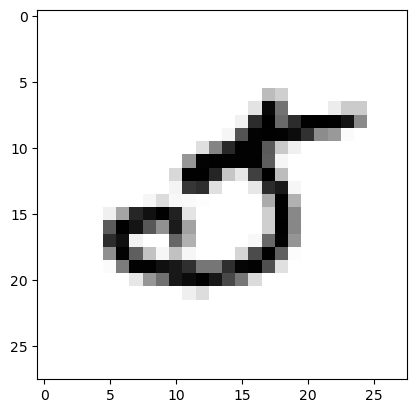

In [7]:
with torch.no_grad():
    wrong_indices = (correct_prediction == 0).nonzero(as_tuple=True)[0]
    r = random.randint(0, len(wrong_indices) - 1)
    r = wrong_indices[r].cpu().item()
    x_single_data = mnist_test.data[r:r+1].view(-1, 28*28).float()
    y_single_data = mnist_test.targets[r:r+1]
    
    print('Label: ', y_single_data.item())
    single_prediction = model(x_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()    